# Community Detection in a Blog network

Reference for the data :

@inproceedings{nr-aaai15,
      title = {The Network Data Repository with Interactive Graph Analytics and Visualization},
      author={Ryan A. Rossi and Nesreen K. Ahmed},
      booktitle = {AAAI},
      url={http://networkrepository.com},
      year={2015}
  }

## 0) Import Libraries

In [41]:
import matplotlib.pyplot as plt
import networkx as nx
import heapq

## 1) Dataset

### Load the data set

Reference for opening mtx file using scipy.io mmread function : https://www.programcreek.com/python/example/101880/scipy.io.mmread

In [5]:
G = nx.read_edgelist('dataset/soc-BlogCatalog.txt', nodetype=int, data=(int,int))

### Explore the properties of the graph

General information of the graph :

In [6]:
print(nx.info(G))

Name: 
Type: Graph
Number of nodes: 88784
Number of edges: 2093195
Average degree:  47.1525


What is the maximum degree a node has ?

In [11]:
nodes = G.nodes
maxDegree = max(G.degree[node] for node in nodes)
maxDegree

9444

What is the minimum degree a node has ?

In [13]:
nodes = G.nodes
minDegree = min(G.degree[node] for node in nodes)
minDegree

1

Is there some cycle in our graph ?

In [12]:
nx.find_cycle(G)

[(1, 3), (3, 7), (7, 1)]

What about triangles ?

## 2) Implementation

### Implement the Girvan-Newman clustering algorithm

Reference which can help : https://github.com/kjahan/community

### Implement the Degree centrality measure

The degree centrality of a node is simply its degree, which is the number of edges which are connected to it.

Let's take an example with the node 10 and calculte its degree :

In [21]:
nodetendegree = G.degree[10]
print("Node 10 has degree "+str(nodetendegree))
print("It is linked to the following nodes :"+str([n for n in G[10]]))

Node 10 has degree 11
It is linked to the following nodes :[11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21]


However, the degree centrality of a node is usually normalized, so this is what we are going to do :

In [33]:
normalized_degree = nodetendegree / (len(G.nodes)-1)
print("Normalized degree of node 10 : "+str(normalized_degree))

Normalized degree of node 10 : 0.00012389759300767038


##### Now we will implement a function which computes the normalized degree centrality for every node and return it in a dictionnary:

In [35]:
def degree_centrality_measure(G):
    nodes = G.nodes
    number_of_nodes = len(nodes)
    max_possible_degree = (number_of_nodes-1)
    results = dict()
    for node in nodes:
        normalized_degree = G.degree[node] / max_possible_degree
        results[node] = normalized_degree
    return results

Let's see if it works by finding the node with the highest degree centrality :

In [38]:
degreeC = degree_centrality_measure(G)
maxDegreeCentralityNode = max(degreeC, key=degreeC.get)
maxDegreeCentralityValue = max(degreeC.values())
print("The node which has the highest degree centrality is the node "
      +str(maxDegreeCentralityNode)+" with a value of : "+str(maxDegreeCentralityValue))

The node which has the highest degree centrality is the node 32 with a value of : 0.10637171530585811


## 3) Analysis

### Identify users’ communities in the blog network using Girvan-Newman. Evaluate with different values of the iteration level.

### Identify the top k users with the highest Degree centrality in the graph. Experiment with different values of k and choose the most appropriate one.

Let's create a function which list the top k users with highest Degree centrality :

In [42]:
def k_nodes_max_degreeC(dictionary, k):
    k_nodes = heapq.nlargest(k, dictionary, key=dictionary.get)
    results = dict()
    for node in k_nodes:
        results[node] = dictionary[node]
    return results

Let's test it with different values of k

In [54]:
def print_k_top(degreeC, k_list):
    for k in k_list:
        i = 1
        print("Top "+str(k)+" :")
        print("-----------------")
        result_dict = k_nodes_max_degreeC(degreeC, k)
        for entry in result_dict:
            print("{0:3d}) Node: {1:5d}, Value: {2:.3f}".format(i, entry, result_dict[entry]))
            i = i+1
        print("----------------")

In [56]:
degreeC = degree_centrality_measure(G)
print_k_top(degreeC, [5,10,20,50,100])

Top 5 :
-----------------
  1) Node:    32, Value: 0.106
  2) Node:    94, Value: 0.106
  3) Node:    35, Value: 0.104
  4) Node:  1082, Value: 0.103
  5) Node:  1140, Value: 0.103
----------------
Top 10 :
-----------------
  1) Node:    32, Value: 0.106
  2) Node:    94, Value: 0.106
  3) Node:    35, Value: 0.104
  4) Node:  1082, Value: 0.103
  5) Node:  1140, Value: 0.103
  6) Node:    33, Value: 0.102
  7) Node:  1355, Value: 0.101
  8) Node:    31, Value: 0.099
  9) Node:    17, Value: 0.098
 10) Node:    91, Value: 0.095
----------------
Top 20 :
-----------------
  1) Node:    32, Value: 0.106
  2) Node:    94, Value: 0.106
  3) Node:    35, Value: 0.104
  4) Node:  1082, Value: 0.103
  5) Node:  1140, Value: 0.103
  6) Node:    33, Value: 0.102
  7) Node:  1355, Value: 0.101
  8) Node:    31, Value: 0.099
  9) Node:    17, Value: 0.098
 10) Node:    91, Value: 0.095
 11) Node:  1205, Value: 0.091
 12) Node:   106, Value: 0.089
 13) Node:  1004, Value: 0.084
 14) Node:   135, 

The top 7 is quite appropriate with a degree centrality higher or equal to 0.100

In [58]:
print_k_top(degreeC, [7])

Top 7 :
-----------------
  1) Node:    32, Value: 0.106
  2) Node:    94, Value: 0.106
  3) Node:    35, Value: 0.104
  4) Node:  1082, Value: 0.103
  5) Node:  1140, Value: 0.103
  6) Node:    33, Value: 0.102
  7) Node:  1355, Value: 0.101
----------------


### Evaluate different random walk strategies to spread a message across the network. The message should reach as many different communities as possible.

# 4) Visualization

### Visualize the output of Girvan-Newman by coloring the nodes according to their assigned communities.

### Visualize the top k users with highest Degree centrality and their 1 degree neighbors.

In [61]:
def one_degree_neighbor(neighbors):
    results = []
    for node in neighbors:
        if G.degree[node] == 1:
            results.append(node)
    return results

In [79]:
def visualize_k_top(degreeC, k):
    #configurate plot
    fig=plt.figure(figsize=(20, 20))
    ax = fig.add_subplot(111) # the big subplot
    ax.spines['top'].set_color('none')
    ax.spines['bottom'].set_color('none')
    ax.spines['left'].set_color('none')
    ax.spines['right'].set_color('none')
    ax.tick_params(labelcolor='w', top=False, bottom=False, left=False, right=False)
    
    rows = k
    #choose what to plot
    result_dict = k_nodes_max_degreeC(degreeC, k)
    i = 1
    print("Top "+str(k)+" :")
    print("-----------------")
    for node in result_dict:
        list_nodes = one_degree_neighbor([n for n in G[node]])
        list_nodes.append(node)
        subG = G.subgraph(list_nodes)
        subplot = fig.add_subplot(rows, 1, i)
        subplot.set_title(i)
        img = nx.draw_networkx(subG)
        i += 1
    plt.show

Top 7 :
-----------------


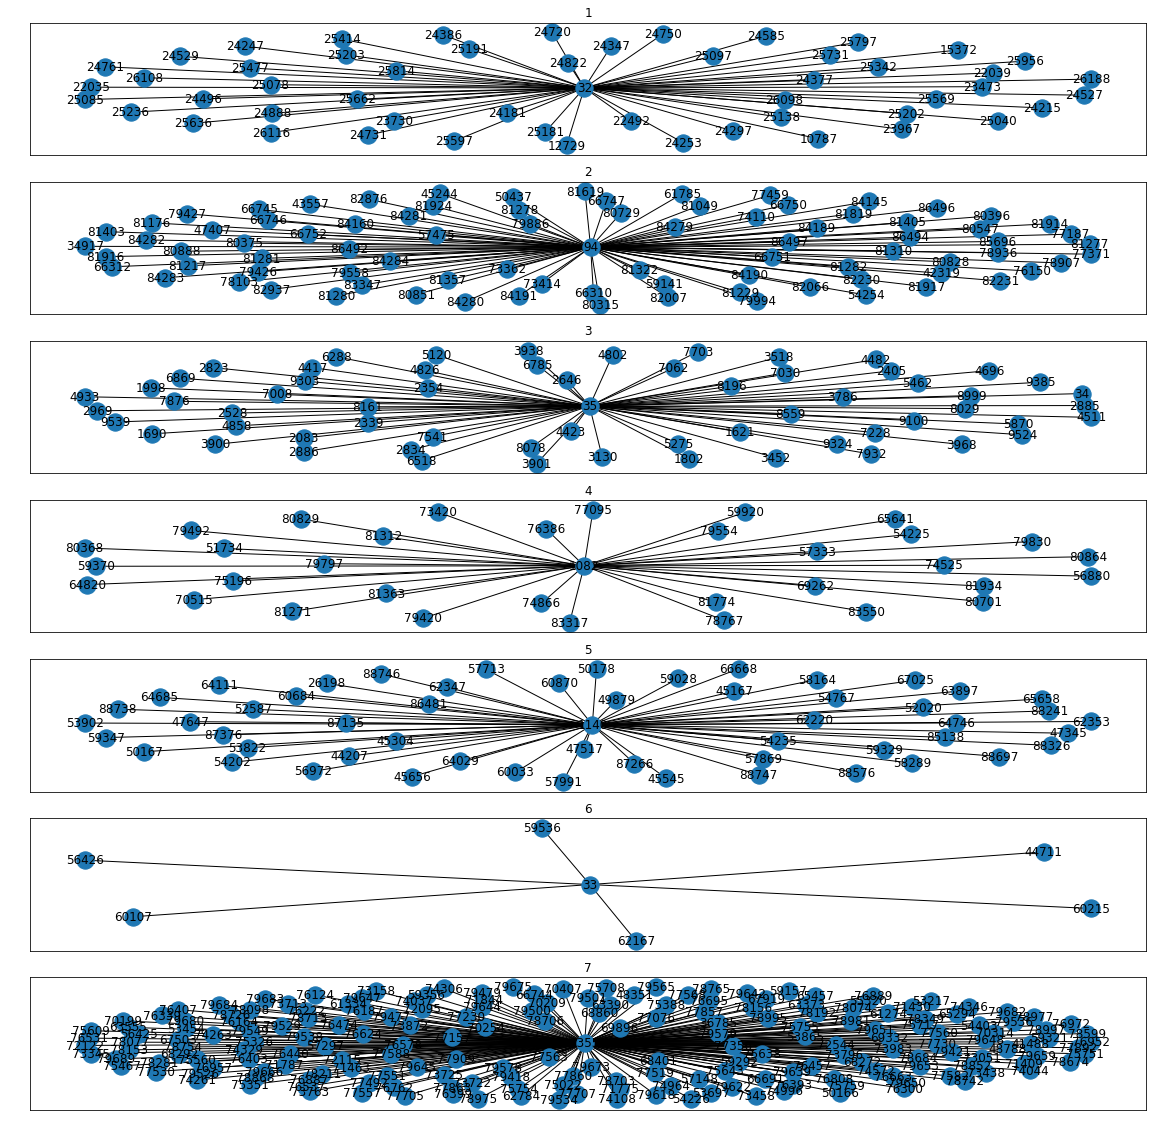

In [82]:
visualize_k_top(degreeC, 7)